In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial import distance
from scipy.interpolate import interpn
from scipy.interpolate import RegularGridInterpolator, LinearNDInterpolator
import heapq
import math

In [4]:
cut = 25*8
fig = plt.figure(figsize =(6 , 6))
levels = np.linspace ( 0 , cut , 50 )

<Figure size 600x600 with 0 Axes>

7.5 7.5 1254.4182291253965


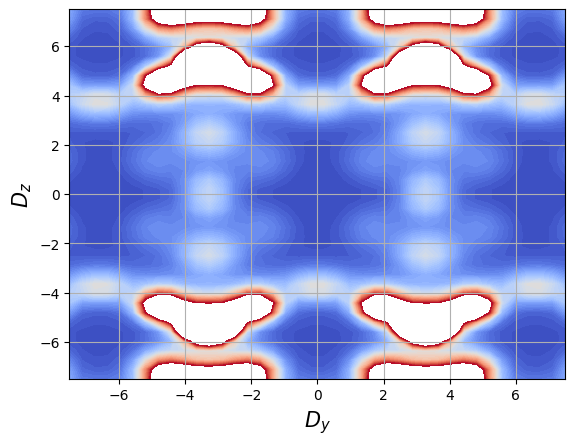

In [5]:
# Loading data from a text file and processing it

data = np.loadtxt('PES.txt')
x , y , z = data[:,0], data [:,1], data[:, 2]
N = int(np.sqrt(len(data)))
x = x.reshape(N, N ) ; y = y.reshape(N, N )
# np.random.shuffle(z)
z = z.reshape(N, N)
z -= z.min( ) ; print(x.max(), y.max() , z.max() )

fig, ax = plt.subplots()

cf = ax.contourf( x , y , z , levels = levels , cmap = cm.coolwarm )
plt.xlabel( '$D_y$' , fontsize = 15)
plt.ylabel( '$D_z$' , fontsize = 15)
plt.grid( )
# plt.savefig('PES−example.pdf' )

## LATEST

In [6]:
def Interpolate(x,y,z,i,j):
    '''
    Linear interpolation of z-value from original x and y values
    
    Args:
        x, y, z: Original data
        i, j: Interpolation coordinates (x, y)
        
    Returns:
        Interpolated z value
    '''
    temp = LinearNDInterpolator(list(zip(x.flatten(),y.flatten())), z.flatten())(i,j)
    return round(float(temp),3)

In [11]:
class Node:
    def __init__(self, x, y, z, parent=None):
        '''
        Args:
            x, y: Coordinates
            z: Density
        '''
        self.x = x
        self.y = y
        self.z = z
        self.parent = parent
        self.g = 0
        self.h = 0

    def __lt__(self, other):
        return self.g + self.h < other.g + other.h

    def __repr__(self):
        return f"({self.x}, {self.y}, {self.z})"

def find_path(x,y,z, source, destination):
    """Finds the shortest path between two nodes in a 2d field.

    Args:
        x, y, z: Original data array.
        source: The starting point.
        destination: The ending point.

    Returns:
        A list of nodes representing the shortest path from the source to the destination.
    """
    
    queue = []
    visited = set()

    start_node = Node(source[0], source[1], Interpolate(x,y,z,source[0], source[1]))
    dest_node = Node(destination[0], destination[1], Interpolate(x,y,z,destination[0], destination[1]))
    
    heapq.heappush(queue, start_node)

    counter = 0             # Delete this line
    while queue:
        counter += 1        # Delete this line
        current_node = heapq.heappop(queue)

        # Delete this block
        if counter%100 == 0:  
            print(counter)
            # print(visited)
            
        if current_node.x == destination[0] and current_node.y == destination[1]:
            print(counter)                     # Delete this line
            return retrace_path(current_node)

        visited.add((current_node.x, current_node.y))

        # Added by me
        
        neighbors = [(current_node.x + 1, current_node.y),
                     (current_node.x - 1, current_node.y),
                     (current_node.x, current_node.y + 1),
                     (current_node.x, current_node.y - 1)]

        for neighbor in neighbors:
            if neighbor[0] >= x.min() and neighbor[0] <= x.max() and neighbor[1] >= y.min() and neighbor[1] <= y.max() and neighbor not in visited:
                neighbor_z = Interpolate(x,y,z,neighbor[0], neighbor[1])
                new_node = Node(neighbor[0], neighbor[1], neighbor_z, current_node)
                new_node.g = heuristic(start_node, new_node)
                new_node.h = heuristic(new_node, dest_node)

                heapq.heappush(queue, new_node)

    print(counter)           # Delete this line
    return None

def retrace_path(node):
    path = []
    current_node = node

    while current_node is not None:
        path.append(current_node)
        current_node = current_node.parent

    return path[::-1]

def heuristic(node_from, node_to):
    """Estimates the cost of the path from the current node to the destination node.

    Args:
        node: The current node.
        destination: The destination node.

    Returns:
        An estimate of the cost of the path from the current node to the destination node.
    """

    dx = abs(node_from.x - node_to.x) ** 2
    dy = abs(node_from.y - node_to.y) ** 2
    dz = abs(node_from.z - node_to.z)
    return math.sqrt(dx+dy) * dz


In [12]:
# Example usage:

source = (0, 0)
destination = (0,6)

path = find_path(x,y,z, source, destination)

if path:
    print("The shortest path is:", path)
else:
    print("No path found.")

100
200
272
The shortest path is: [(0, 0, 0.023), (0, 1, 1.112), (0, 2, 2.746), (1, 2, 11.972), (1, 3, 20.282), (1, 4, 80.347), (1, 5, 35.081), (0, 5, 7.103), (0, 6, 2.631)]


## Plotting

In [13]:
points_x = [i.x for i in path]
points_y = [i.y for i in path]


In [14]:
ax.plot(points_x, points_y, marker='o', linestyle='-', color='red')


In [ ]:
fig